Importing the libraries

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

Importing the dataset

In [311]:
data = pd.read_csv("CarPriceDataset.csv")

Exploratory Analysis Of the data

In [312]:
data

,Brand,Price,Body,Mileage,EngineV,EngineType,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [313]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   EngineType    4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [315]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
EngineType        0
Registration      0
Year              0
Model             0
dtype: int64

Observe that there are null values in the dataset hence pre-processing is required here.

Removing the rows which contain null values from the 'Price' and 'EngineV' columns

In [316]:
data = data.drop(['Model'], axis=1)

In [317]:
data.dropna(inplace=True)

In [318]:
#Displaying the data info after deleting the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   EngineType    4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


In [319]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
EngineType      0
Registration    0
Year            0
dtype: int64

Visualiizing the dataset

array([[<AxesSubplot: title={'center': 'Price'}>,
        <AxesSubplot: title={'center': 'Mileage'}>],
       [<AxesSubplot: title={'center': 'EngineV'}>,
        <AxesSubplot: title={'center': 'Year'}>]], dtype=object)

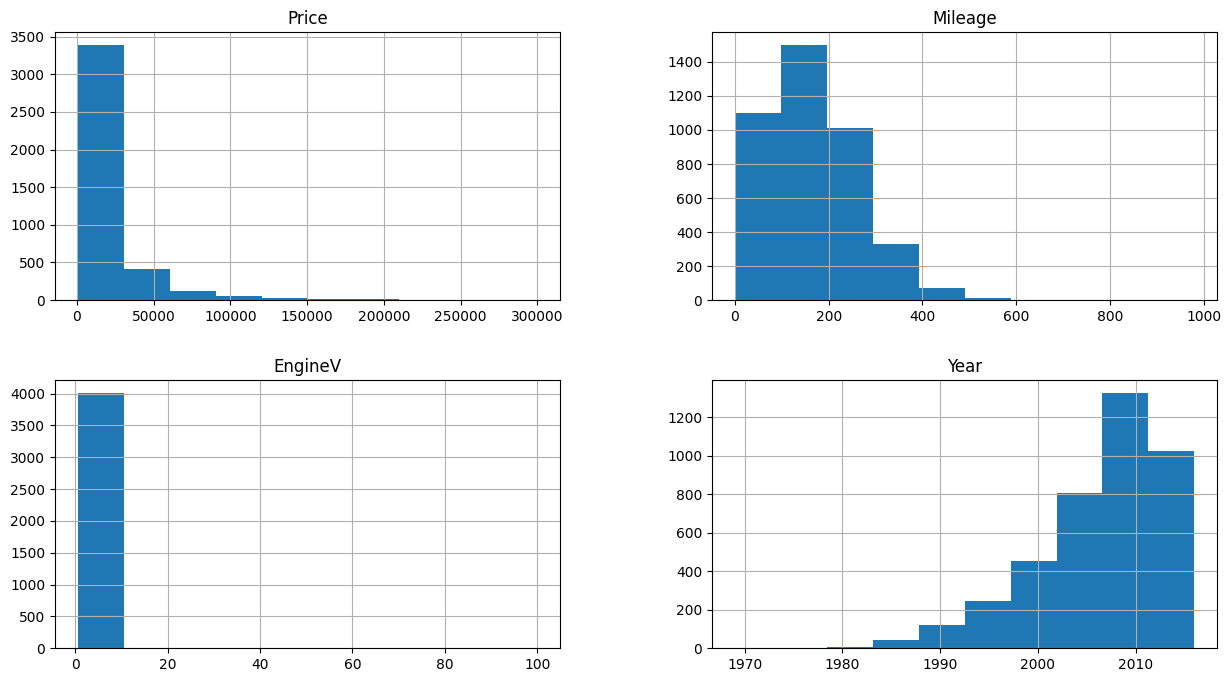

In [320]:
data.hist(figsize=(15,8))

Observe that dataset is right skewed for the 'Price' and 'EngineV' colums and the data is left skewed for the 'Mileage' and 'Year' colums

C:\Users\Tharika\AppData\Local\Temp\ipykernel_58584\1679999493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<AxesSubplot: >

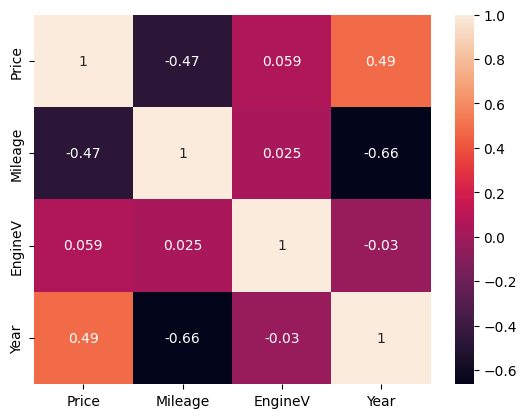

In [321]:
sns.heatmap(data.corr(), annot = True)

Inferences from the heatmap are 1) price correaltes well with the year 

One-Hot Encoding

In [322]:
data.Brand.value_counts()

Volkswagen       880
Mercedes-Benz    823
BMW              640
Toyota           510
Renault          445
Audi             420
Mitsubishi       307
Name: Brand, dtype: int64

In [323]:
data = data.join(pd.get_dummies(data.Brand)).drop(['Brand'], axis =1)

In [324]:
data = data.join(pd.get_dummies(data.Body)).drop(['Body'], axis =1)

In [325]:
data = data.join(pd.get_dummies(data.EngineType)).drop(['EngineType'], axis =1)

In [326]:
data = data.join(pd.get_dummies(data.Registration)).drop(['Registration'], axis =1)

In [327]:
# X_train = data.drop(['Price'], axis=1)
# y_train = train_data['Price']

In [328]:
data

,Price,Mileage,EngineV,Year,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,...,other,sedan,vagon,van,Diesel,Gas,Other,Petrol,no,yes
0,4200.0,277,2.0,1991,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,7900.0,427,2.9,1999,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,13300.0,358,5.0,2003,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,23000.0,240,4.2,2007,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,18300.0,120,2.0,2011,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
4340,125000.0,9,3.0,2014,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4341,6500.0,1,3.5,1999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4342,8000.0,194,2.0,1985,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


Obtaining the the dependent and Independent variables

In [329]:
#axis = 1 because column is dropped, X is the dataset without 'Price'
X = data.drop(['Price'], axis = 1) 
y = data['Price']

Splitting the datset into Train data and test data

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [331]:
print(X)

      Mileage  EngineV  Year  Audi  BMW  Mercedes-Benz  Mitsubishi  Renault  \
0         277      2.0  1991     0    1              0           0        0   
1         427      2.9  1999     0    0              1           0        0   
2         358      5.0  2003     0    0              1           0        0   
3         240      4.2  2007     1    0              0           0        0   
4         120      2.0  2011     0    0              0           0        0   
...       ...      ...   ...   ...  ...            ...         ...      ...   
4339       35      1.6  2014     0    0              0           0        0   
4340        9      3.0  2014     0    0              1           0        0   
4341        1      3.5  1999     0    1              0           0        0   
4342      194      2.0  1985     0    1              0           0        0   
4344      124      2.0  2013     0    0              0           0        0   

      Toyota  Volkswagen  ...  other  sedan  vagon 

Combining the X_train and y_train data to perform feature scaling since some colums are skewed, hence applying logarithm to obtain a Gaussian Bell curve

In [332]:
train_data = X_train.join(y_train)

In [333]:
train_data['Price'] = np.log(train_data['Price'] +1)
train_data['EngineV'] = np.log(train_data['EngineV'] +1)
train_data['Mileage'] = np.log(train_data['Mileage'] +1)
train_data['Year'] = np.log(train_data['Year'] +1)

Training the model

In [334]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the test results

In [335]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
#print(np.concatenate((y_pred(len(y_pred),1), y_test(len(y_test),1)), axis = 1))

In [336]:
print(X_train)

      Mileage  EngineV  Year  Audi  BMW  Mercedes-Benz  Mitsubishi  Renault  \
981       152      2.0  2009     0    0              0           0        0   
4285      180      3.0  2006     0    0              1           0        0   
3420      252      4.2  2002     0    0              0           0        0   
2619      181      1.6  2012     0    0              0           0        0   
2747      370      2.2  1995     0    0              1           0        0   
...       ...      ...   ...   ...  ...            ...         ...      ...   
1822      205      4.2  2007     1    0              0           0        0   
2274       86      2.2  2014     0    0              0           0        0   
716       197      3.0  2006     0    0              0           1        0   
1985      350      1.8  1990     0    0              0           1        0   
3909      110      2.0  2008     0    0              0           1        0   

      Toyota  Volkswagen  ...  other  sedan  vagon 

Predicting the cost of car using user input

In [339]:
print(regressor.predict([[270, 2.0, 1998, 1, 0, 0, 0, 0, 0, 0,1 ,0 , 0, 0, 1, 0, 0 , 0, 0, 0,0,1]]))

[15421.44]


C:\Users\Tharika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[   -66.97    224.54   1099.02    992.83   -896.09  -1505.82   1409.08
  12568.28  -5464.86    867.7   -1877.66  -2562.53  -3530.93   3815.16
   6354.57  15333.93 -10221.42  -9152.43  -3458.18  -2671.64]
-2178502.849489676
